In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'Arial'

In [2]:
data = pd.read_csv('E14TG2aR.csv', index_col=0)
df = data[data['markers'] != 'unknown']
df.columns = ['F{}'.format(i + 1) for i in range(len(df.columns[:-1]))] + ['markers']
df.markers.value_counts()

Mitochondrion            140
Endoplasmic reticulum     48
Plasma membrane           41
60S Ribosome              35
Cytosol                   24
40S Ribosome              23
Nucleus - Nucleolus       15
Lysosome                  15
Nucleus - Chromatin       15
Proteasome                12
Name: markers, dtype: int64

In [75]:
col = ["#E41A1C","#377EB8","#238B45","#FF7F00","#FFD700",
           "#333333","#00CED1","#A65628","#F781BF","#984EA3",
           "#9ACD32","#B0C4DE","#00008A","#8B795E","#FDAE6B",
           "#66C2A5","#276419","#CD8C95","#6A51A3","#EEAD0E",
           "#0000FF","#9ACD32","#CD6090","#CD5B45","#8E0152",
           "#808000","#67000D","#3F007D","#6BAED6","#FC9272"]
col[5] ='purple'

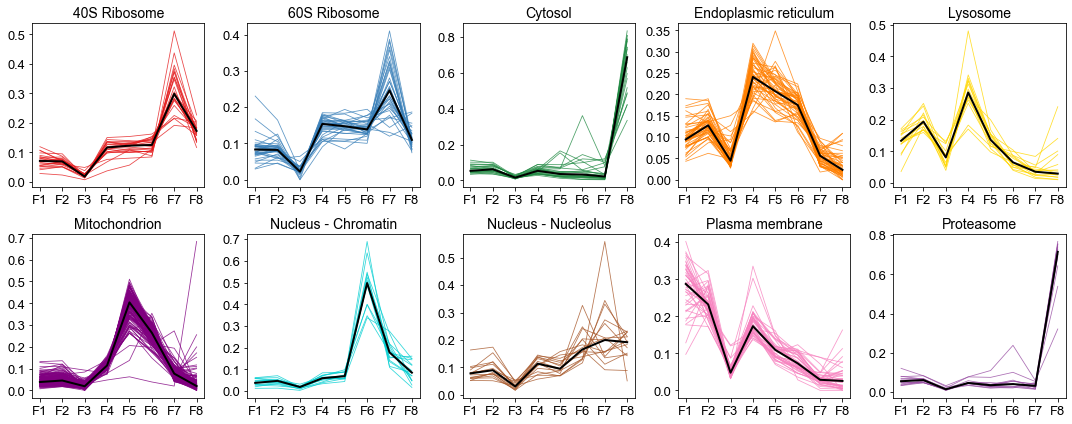

In [76]:
plt.figure(figsize=(15, 6))
for i, marker in enumerate(sorted(pd.unique(df.markers))): 
    plt.subplot(2,5, i+1)
    x =df[df['markers'] == marker]
    for j in x.index:
        plt.plot(x.columns[:-1], x.loc[j, df.columns[:-1]],
                 col[i],lw=0.8, alpha=0.8)
    plt.plot(x.columns[:-1], x[df.columns[:-1]].median(0), 'black',lw=2,alpha=1)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.title(marker, fontsize=14)
    plt.tight_layout()
plt.savefig('../figure/E14TG2aR_IntensityDistribution.pdf')

In [42]:
df_md = df.groupby('markers').median()
df_md.to_csv('E14TG2aR_meadin.csv')
df_md

,F1,F2,F3,F4,F5,F6,F7,F8
markers,,,,,,,,
40S Ribosome,0.070936,0.069254,0.017961,0.116521,0.122498,0.124952,0.298198,0.172574
60S Ribosome,0.083249,0.082127,0.022249,0.153874,0.147333,0.138610,0.246148,0.109707
Cytosol,0.053452,0.062289,0.015545,0.053482,0.035656,0.033111,0.021413,0.687676
Endoplasmic reticulum,0.094617,0.127594,0.044659,0.241145,0.207370,0.175167,0.056224,0.023225
Lysosome,0.133090,0.193524,0.080381,0.285889,0.136181,0.064746,0.034977,0.029123
Mitochondrion,0.038331,0.045125,0.018848,0.114182,0.403945,0.264563,0.076792,0.019586
Nucleus - Chromatin,0.038223,0.047447,0.019123,0.059676,0.069332,0.497801,0.178423,0.085284
Nucleus - Nucleolus,0.077749,0.089338,0.029971,0.113226,0.094869,0.165270,0.199586,0.191558
Plasma membrane,0.287254,0.231907,0.047657,0.173310,0.109157,0.072834,0.028567,0.025351


In [43]:
def makemap(df0, r, e=1e-6):
    df = np.array(deepcopy(df0))
    n, m = df.shape
    f = int(m / r)
    df = np.hstack([df[:, j * f:(j + 1) * f] /
                    df[:, j * f:(j + 1) * f].sum(1).reshape(-1, 1) for j in range(r)])
    f_mean = df.mean(1)
    data = np.zeros((n, 1, m, m), dtype=np.float)
    for x in range(n):
        for i in range(m):
            for j in range(m):
                if i < j:
                    data[x, 0, i, j] = df[x, i] - df[x, j]
                if i == j:
                    data[x, 0, i, j] = df[x, i] - f_mean[x]
                if i > j:
                    data[x, 0, i, j] = np.tanh(np.log2((df[x, i] + e) / (df[x, j] + e)))
    return data.round(3)

In [58]:
df_maps = makemap(df_md, r=1)
df_maps.shape

<ipython-input-43-5291fe294b5c>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = np.zeros((n, 1, m, m), dtype=np.float)


(10, 1, 8, 8)

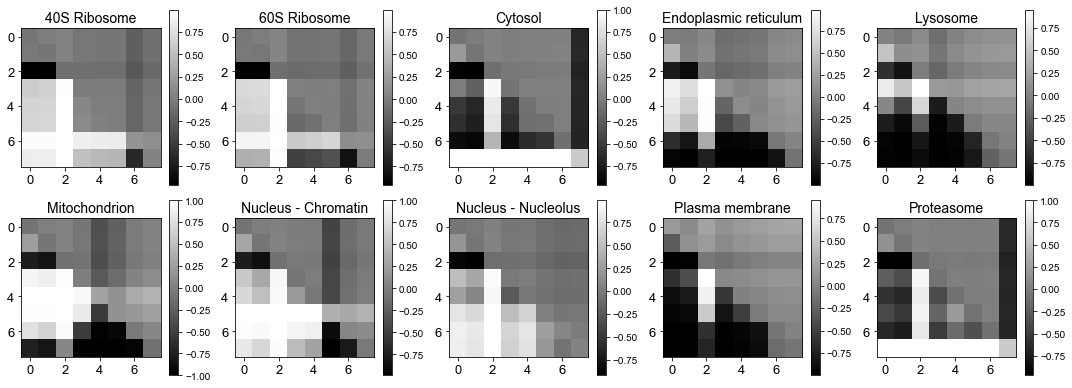

In [71]:
plt.figure(figsize=(15, 5.5))
for i, df_map in enumerate(df_maps):
    plt.subplot(2,5, i+1)
    marker = df_md.index[i]
    plt.imshow(df_map[0], cmap=plt.cm.gray)
    plt.colorbar()
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.title(marker, fontsize=14)
    plt.tight_layout()
plt.savefig('../figure/E14TG2aR_FeatureMap.pdf')